# Telco Churn Analysis
Telco, a telecommunications service provider, currently faces about a 25% likelihood that their customers will leave their company. We are going to find out what is causing this & help them predict customer churn. 

## <ins>Imports</ins>

In [1]:
import acquire as a
import prepare as p
import explore as e
import model as m

import numpy as np
import pandas as pd

## <ins>Acquire</ins>

* Data acquired from the Codeup MySQL database `telco_churn`
* It contained 7043 rows and 22 columns before preparing.
* Each row represents an individual customer at Telco
* Each column represents a feature of the customers.

In [2]:
# Acquiring data using acquire_data() from acquire.py
# Assigning the result to the variable 'df'

df = a.acquire_data()

## <ins>Prepare</ins>

* Drop duplicate columns since data exists elsewhere
    * `payment_type_id`
    * `internet_service_type_id`
    * `contract_type_id`
* Create `internet_service` column to indicate whether a customer subscribes to internet service
* Correct values & datatypes
    * changed values in the `senior_citizen` column from '1 or 0' to 'Yes or No'
    * changed values in the `churn` column from 'Yes or No' to '1 or 0'
    * filled null values in the `internet_service_type` with 'No internet service'
    * changed values in the `total_charges` to a float
* Set the index to the `customer_id` column since this information is a unique identifier
* Split data into 3 new dataframes, stratifying on `churn`:
    * Train - 60% of the original dataframe
    * Validate - 20% of the original dataframe
    * Test - 20% of the original dataframe
* No outliers have been removed

In [3]:
# Calling prepare_data() from prepare.py to process and modify the DataFrame 'df'
# Assigning back to the variable 'df'

df = p.prepare_data(df)

In [4]:
# Splitting the DataFrame 'df' into training, validation, and test sets using the 'churn' column for stratification
# The resulting subsets are assigned to variables 'train', 'validate', and 'test'

train, validate, test = p.split_data(df,'churn')

In [5]:
# Displaying a few rows of the 'train' DataFrame for a quick glimpse

train.tail(5)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,,
2262-SLNVK,Female,No,No,No,1,Yes,No,Yes,No,No,...,No,No,No,No,70.10,70.10,0,Month-to-month,Fiber optic,Electronic check
0404-AHASP,Male,No,Yes,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.70,1421.90,0,Two year,No internet service,Credit card (automatic)
7767-UXAGJ,Male,No,No,No,1,Yes,Yes,Yes,No,No,...,No,No,No,Yes,50.45,50.45,1,Month-to-month,DSL,Electronic check
0603-OLQDC,Male,No,No,Yes,12,Yes,No,Yes,Yes,No,...,No,Yes,Yes,Yes,69.85,837.50,0,Month-to-month,DSL,Mailed check
5480-HPRRX,Female,Yes,No,No,3,No,No phone service,Yes,No,No,...,No,No,No,No,25.30,77.75,1,Month-to-month,DSL,Electronic check


## <ins>Exploratory Analysis</ins>

In the exploration phase, we are going to ask/answer the following questions:
* How often are customers churning
* How does tenure affect the churn rate?
* How does monthly_charges affect the churn rate?
* How does contract_type affect the churn rate?

### How often are customers churning?

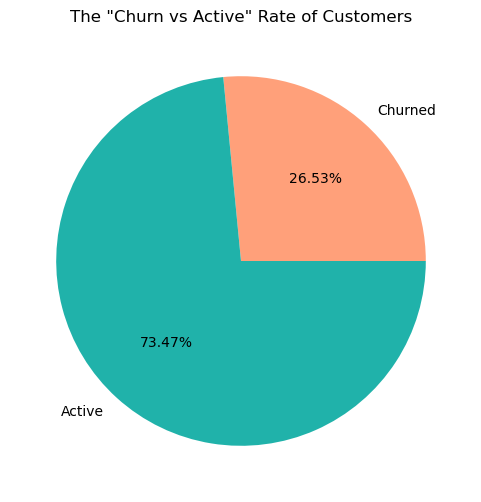

In [6]:
# Creating a pie chart visualization of churn distribution using pie_churn() from explore.py

e.pie_churn(train)

> When using the training data, customers are churning at a rate of 26.53%.

### Does `tenure` affect the churn rate? 

**<ins>Hypothesis Testing:</ins>**

**Formulate a null and alternative hypothesis**

> $H_0$: There is NO relationship between tenure & churn rate

> $H_a$: There IS a relationship between tenure & churn rate

**confidence interval: 95%**

**alpha: .05** 

**Since we are comparing a continuous variable to a categorical variable & the continuous variable is NOT normally distributed, we will use the Mann-Whitney test.**

In [7]:
# Performing Mann-Whitney U test on the 'tenure' & 'churn' variables using mann_whitney_tenure() from explore.py

e.mann_whitney_tenure(train)

p-value: 0.000000
There IS a relationship between tenure & churn rate!


**<ins>Visualization:</ins>**

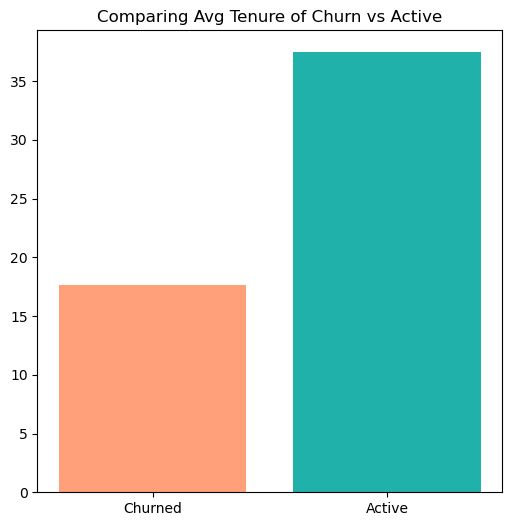

In [8]:
# Creating a bar chart visualization for the 'tenure' variable using bar_tenure() from explore.py

e.bar_tenure(train)

> The difference in the average tenure between churned & active customers is 19.85 months. We can see that on average, the active customers have a higher tenure while that of the churned customers is lower. Thus concluding that tenure DOES have an affect on the churn rate.

### Does `monthly_charges` affect the churn rate?

**<ins>Hypothesis Testing:</ins>**

**Formulate a null and alternative hypothesis**

> $H_0$: There is NO relationship between monthly_charges & churn rate

> $H_a$: There IS a relationship between monthly_charges & churn rate

**confidence interval: 95%**

**alpha: .05** 

**Since we are comparing a continuous variable to a categorical variable & the continuous variable is NOT normally distributed, we will use the Mann-Whitney test.**

In [9]:
# Performing Mann-Whitney U test on the 'monthly_charges' & 'churn' variables using mann_whitney_tenure() from explore.py

e.mann_whitney_monthly_charges(train)

p-value: 0.000000
There IS a relationship between monthly_charges & churn rate!


**<ins>Visualization:</ins>**

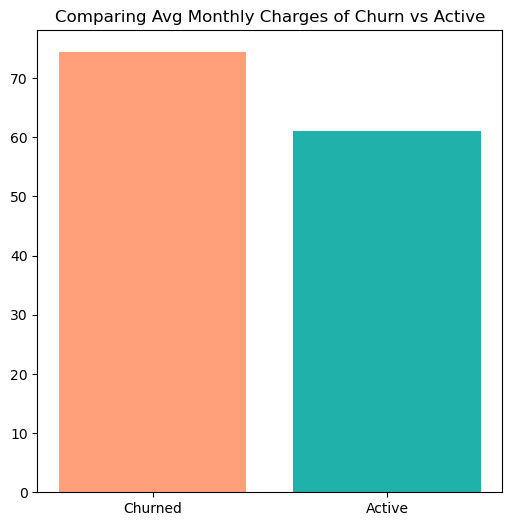

In [10]:
# Creating a bar chart visualization for the 'monthly_charges' variable using bar_monthly_charges() from explore.py

e.bar_monthly_charges(train)

> The difference in the average monthly charges between churned & active customers is $13.38. We can see that on average, the churned customers have a higher monthly charge while that of the active customers is lower. Thus concluding that monthly_charges DOES have an affect on the churn rate.

### Does `contract_type` affect the churn rate?

**<ins>Hypothesis Testing:</ins>**

**Formulate a null and alternative hypothesis**

> $H_0$: There is NO relationship between contract_type & churn rate

> $H_a$: There IS a relationship between contract_type & churn rate

**confidence interval: 95%**

**alpha: .05**

**Since we are comparing two categorical variables, we will use the $χ^2$ test.**

In [11]:
# Performing chi2 test on the 'contract_type' & 'churn' variables using chi_squared_contract_type() from explore.py

e.chi_squared_contract_type(train)

p-value: 0.000000
There IS a relationship between contract_type & churn rate!


**<ins>Visualization</ins>**

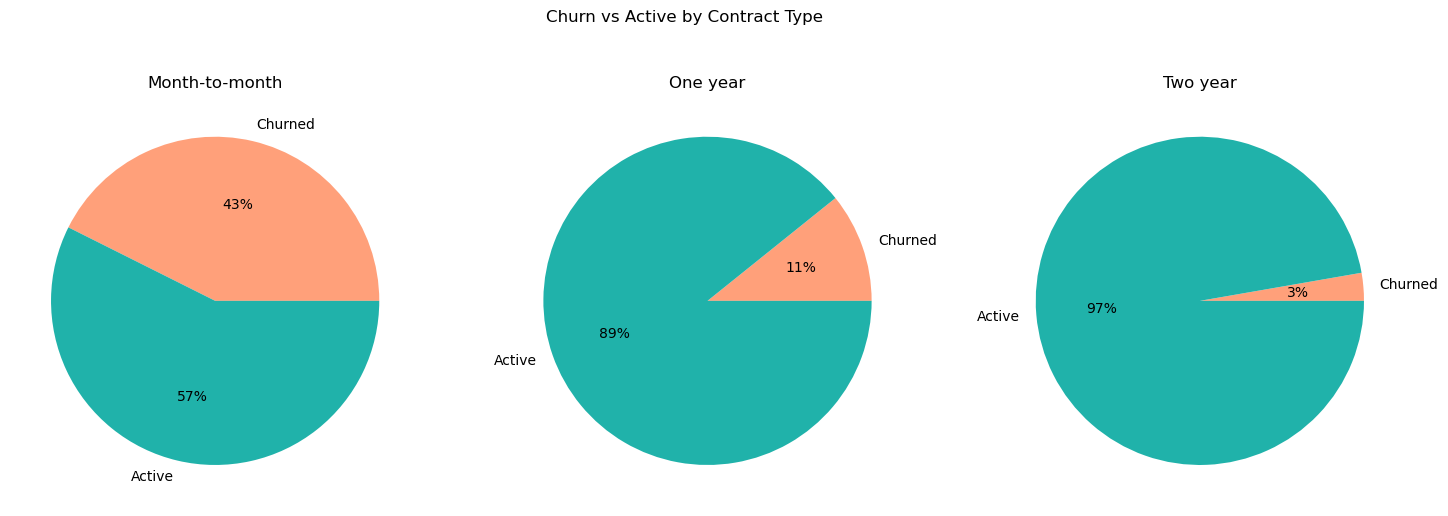

In [12]:
# Creating a pie chart visualization for churn distribution by contract type
# Using the pie_churn_by_contract_type() method from explore.py

e.pie_churn_by_contract_type(train)

> There is a 32% difference in churn rate between the month-to-month contracts & one-year contracts

> There is a 40% difference in churn rate between the month-to-month contracts & two-year contracts

> There is an 8% difference in churn rate between the one-year contracts & two-year contracts

> We can see that customers with a month-to-month contract have a much higher churn rate compared to those with a longer-term contract. Thus concluding that contract_type DOES have an affect on the churn rate.

### Summary

## <ins>Model</ins>

**<ins>Preprocessing:</ins>**
* replaced `No phone service` with `No` from `multiple_lines` (this info is in the `phone_service` column)
* replaced `No internet service` with `No` from: (this info is in the `internet_service` column)
    * `online_security`
    * `online_backup`
    * `device_protection`
    * `tech_support`
    * `streaming_tv`
    * `streaming_movie`
* encoded our train, validate, test dfs for our categorical columns

In [13]:
# Preprocessing the train, validate, and test DataFrames using preprocess() from model.py

train, validate, test = m.preprocess(train, validate, test)

**Baseline Accuracy:**

In [14]:
# Baseline accuracy is obtained by subtracting the mean of 'churn' from 1

1-train.churn.mean()

0.7346745562130177

### Decision Tree

In [15]:
# Call decision_tree() and store the test accuracy in 'test_acc_dt'

test_acc_dt = m.decision_tree(train,validate,test)

Train Accuracy: 0.7957
Validate Accuracy: 0.7935


### Random Forest

In [16]:
# Call random_forest() and store the test accuracy in 'test_acc_rf'

test_acc_rf = m.random_forest(train, validate, test)

Train Accuracy: 0.7915
Validate Accuracy: 0.7984


### KNN 

In [16]:
# Call knn() and store the test accuracy in 'test_acc_knn'

test_acc_knn = m.knn(train,validate,test)

Train Accuracy: 0.8031
Validate Accuracy: 0.7807


### Logistic Regression

In [17]:
# Call logistic_regression() and store the test accuracy in 'test_acc_logit'

test_acc_logit = m.logistic_regression(train,validate,test)

Train Accuracy: 0.8095
Validate Accuracy: 0.8105


## <ins>Evaluation</ins>

> When reviewing the accuracies of the models above, the Logistic Regression algorithm was MARGINALLY better.

> We will use this algorithm to check the model accuracy of our test data.